# **Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/End_to_End_Financial_Fraud_Anomaly_Detection/Financial_Fraud_Dataset.csv")

## **1. Correlation Between The Attributes (Pearson Correlation Matrix)**

In [ ]:
# selecting the columns of numerical type
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()
correlation

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


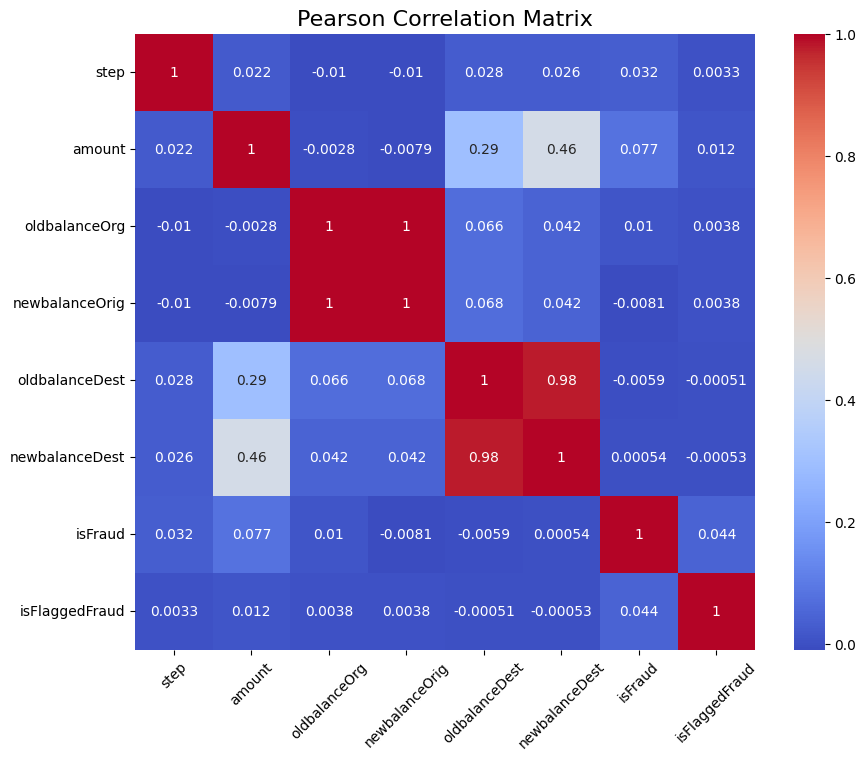

In [ ]:
# visulaising the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,annot = True,cmap = "coolwarm")
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

**Analysis:**

1.  **High Positive Correlation:**
    * `oldbalanceDest` and `newbalanceDest` have a very strong positive correlation (0.98). This is expected, as the new balance is directly related to the old balance plus/minus transactions.
    * `oldbalanceOrg` and `newbalanceOrig` have a perfect correlation of 1. It is expected that the new balance of origin is highly related to the old balance of origin.
2.  **Moderate Positive Correlation:**
    * `amount` has a moderate positive correlation with `newbalanceDest` (0.46) and `oldbalanceDest` (0.29). This suggests that higher transaction amounts are somewhat associated with higher destination balances.
3.  **Weak Correlations:**
    * Most other variable pairs show weak correlations (close to 0). This indicates that there's little to no strong linear relationship between them.
4.  **`isFraud` Correlations:**
    * `amount` has a small positive correlation with `isFraud` (0.077). This means that slightly higher amounts are seen in fraudulent transactions.
    * `isFlaggedFraud` also has a very small positive correlation with `isFraud`(0.044).
5.  **`step` Correlations:**
    * `step` has very weak correlations with all other variables. Meaning the time step of the transaction has very little bearing on the other numerical values.

## **Other Statistical Analysis**

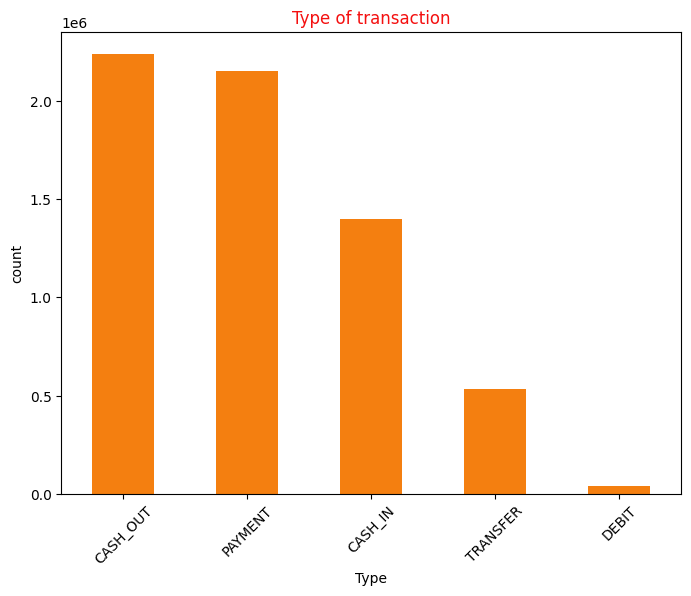

In [ ]:
#2. Type of Transaction
plt.figure(figsize = (8,6))
df['type'].value_counts().plot(kind = 'bar', color = '#F47F10')
plt.title('Type of transaction', color = '#F41010')
plt.xticks(rotation = 45)
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

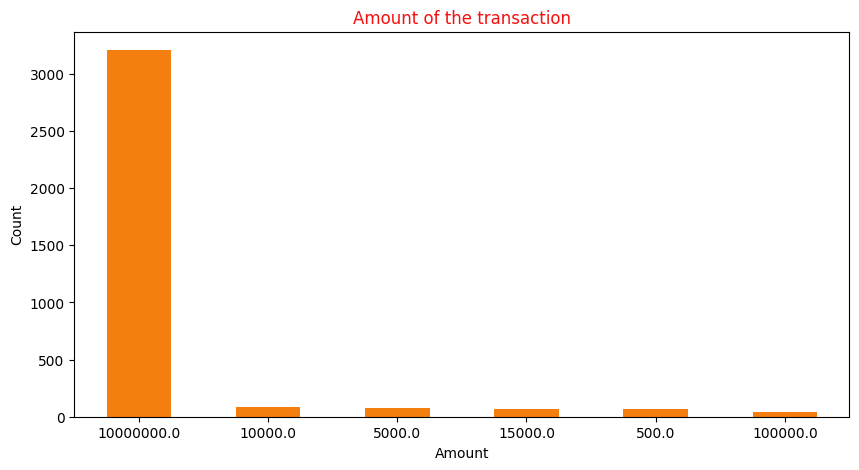

In [ ]:
# 3. Transaction amount and it's count
plt.figure(figsize = (10,5))

df['amount'].value_counts().sort_values(ascending = False).head(6).plot(kind = 'bar',  color = '#F47F10')
# Takes the transaction amounts from the DataFrame.
# Counts how many times each unique amount appears.
# Arranges these amounts from the most frequent to the least frequent.
# Picks the top 6 most frequent amounts.
# Creates a bar plot showing these 6 amounts and how often they occur, using a specific orange color for the bars.

plt.title("Amount of the transaction", color = "#F41010")
plt.xticks(rotation = 0,)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

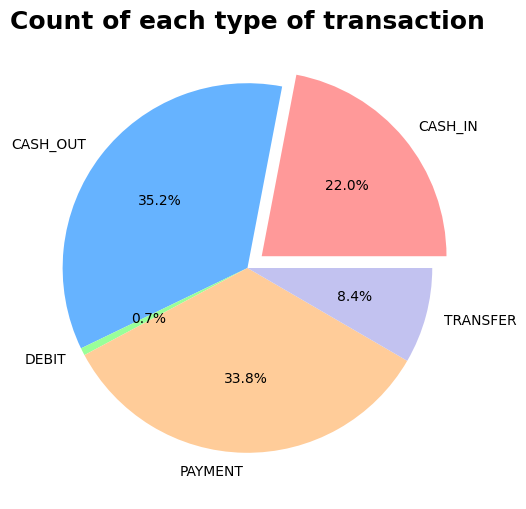

In [ ]:
# 4. Count each type of transaction
counts = df.groupby('type').count()['amount']

# Create a pie chart to visualize the distribution of transaction types.
plt.figure(figsize=(6, 6))  # Set the figure size.

# Create the pie chart.
# 'counts' provides the sizes of the pie wedges.
# 'labels' assigns labels to each wedge, using the index of 'counts' (the transaction types).
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'], explode=(0.1, 0, 0, 0, 0))

# Set the title of the pie chart.
plt.title('Count of each type of transaction', fontweight='bold', fontsize=18)

# Display the pie chart.
plt.show()

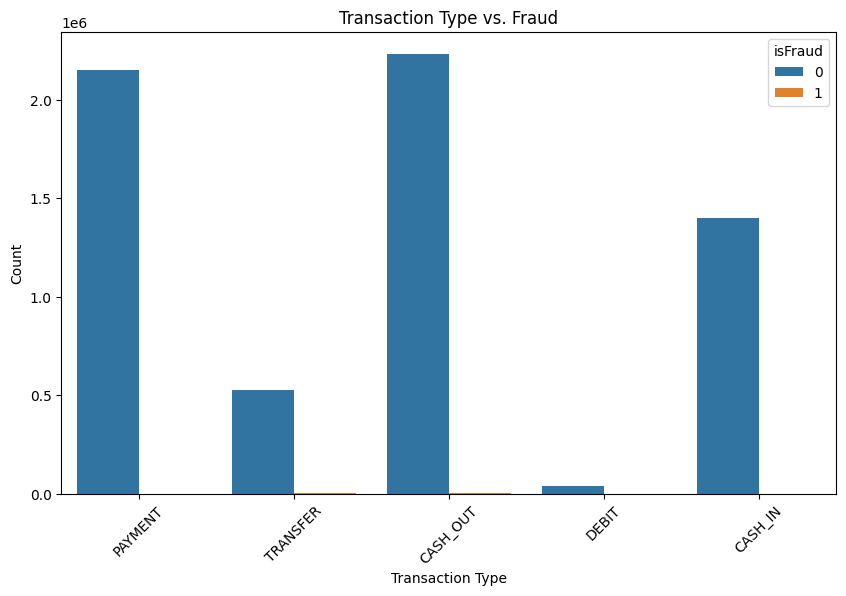

In [ ]:
# 5. Transaction Type vs. Fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type vs. Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45) # rotate x axis labels for readability
plt.show()

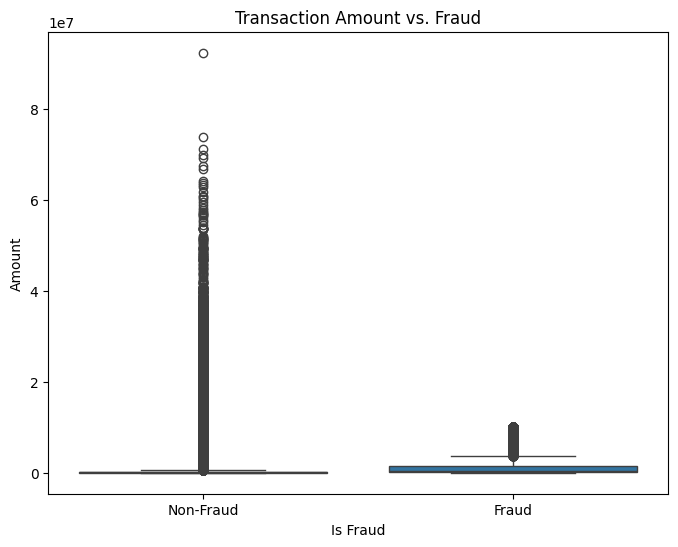

In [ ]:
# 6. Amount vs. Fraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

Fraudulent transactions tend to have a wider range of amounts, including some very high outliers, compared to non-fraudulent transactions.

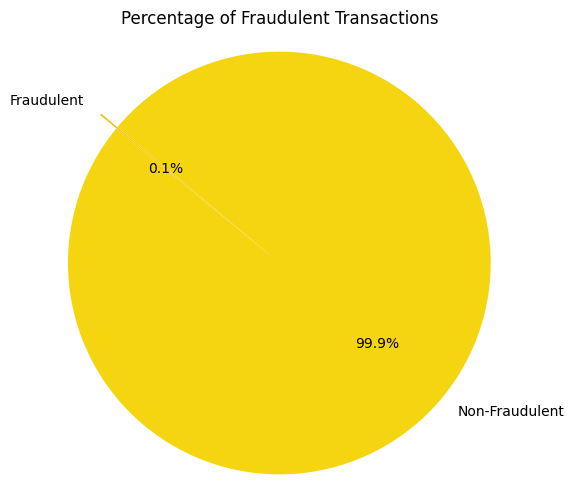

In [ ]:
# Calculate the counts of isFraud
total_transactions = len(df)
fraud_count = df['isFraud'].sum()
non_fraud_count = total_transactions - fraud_count

# Calculate the percentages
fraud_percentage = (fraud_count / total_transactions) * 100
non_fraud_percentage = (non_fraud_count / total_transactions) * 100

# 7. Create a pie chart of Fraud and Non-fraud percentage
plt.figure(figsize=(6, 6))
plt.pie([fraud_percentage, non_fraud_percentage],
        explode=(0.1, 0), # Explode the 1st slice (Fraudulent)
        labels=['Fraudulent', 'Non-Fraudulent'],
        colors=['#F4C010','#F4D510'], # Light red and light blue
        autopct='%1.1f%%',
        startangle=140)

plt.title('Percentage of Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()